SOME TRAINING CODES

In [77]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# Load the image function
def load_image(image_path):
    image = plt.imread(image_path)
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)  # Normalize edilmişse 0-255 aralığına çevir
    return image

In [79]:
# Increase the brightness of the image
def increase_brightness(image, value):
    return np.clip(image + value, 0, 255)

In [80]:
# Greyscale conversion function
def convert_to_grayscale(image):
    if len(image.shape) == 3:  # is image RGB?
        return (0.299 * image[:, :, 0] +
                0.587 * image[:, :, 1] +
                0.114 * image[:, :, 2]).astype(np.uint8)
    return image  # Already greyscale

In [81]:
# Rotate the image function (90 degrees clockwise)
def rotate_image(image):
    return np.transpose(image, (1, 0, 2))[:, ::-1] if len(image.shape) == 3 else np.transpose(image, (1, 0))[:, ::-1]

In [82]:
# Mirror the image horizontally
def flip_image_horizontal(image):
    return image[:, ::-1]

In [83]:
# Mirror the image vertically
def flip_image_vertical(image):
    return image[::-1, :]

In [84]:
# Crop the image
def crop_image(image, start_row, start_col, end_row, end_col):
    return image[start_row:end_row, start_col:end_col]

In [85]:
# Show the image function (Not necessary)
def show_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.show()

In [86]:
# Load the image
image_path = 'man.jpg'  # Change the image path
image = load_image(image_path)

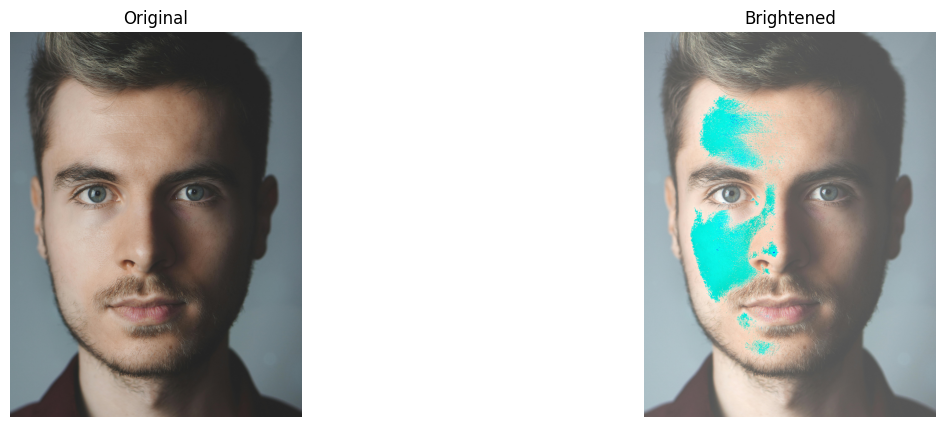

In [87]:
# Increase the brightness of the image
bright_image = increase_brightness(image, 50)
show_images([image, bright_image], ['Original', 'Brightened'])

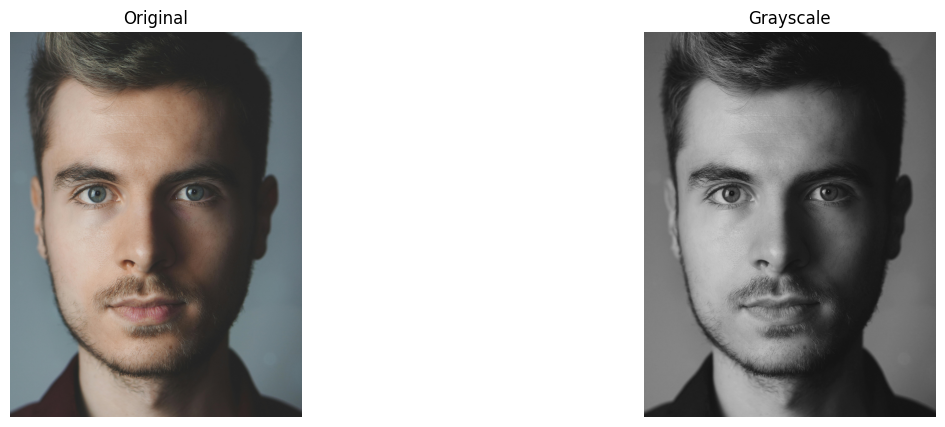

In [88]:
# Greyscale conversion
grayscale_image = convert_to_grayscale(image)
show_images([image, grayscale_image], ['Original', 'Grayscale'])

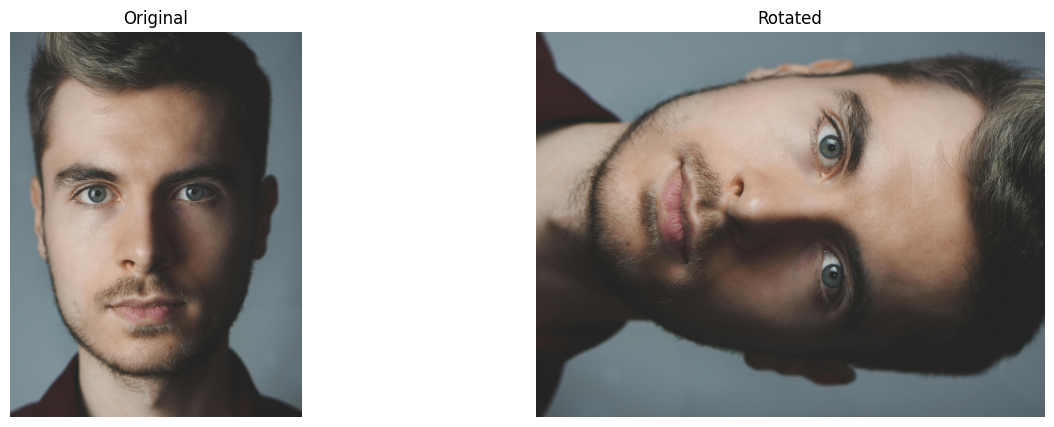

In [89]:
# Rotate the image (90 degrees clockwise)
rotated_image = rotate_image(image)
show_images([image, rotated_image], ['Original', 'Rotated'])

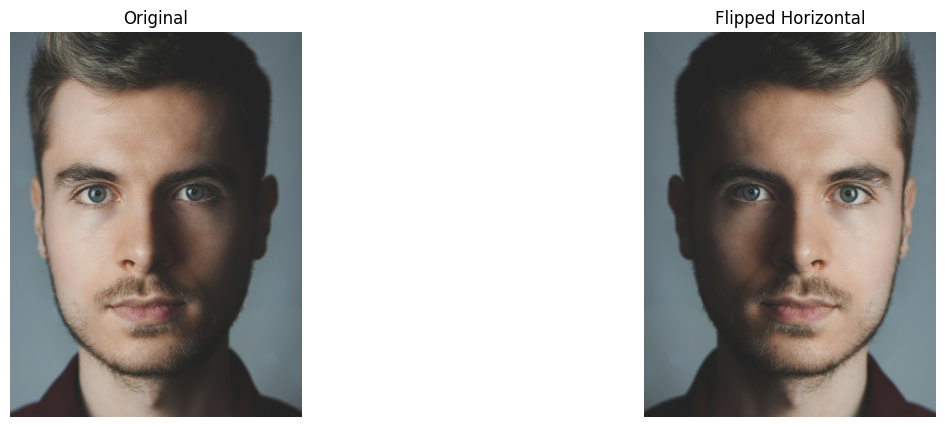

In [90]:
# Mirror the image horizontally
flipped_horizontal = flip_image_horizontal(image)
show_images([image, flipped_horizontal], ['Original', 'Flipped Horizontal'])

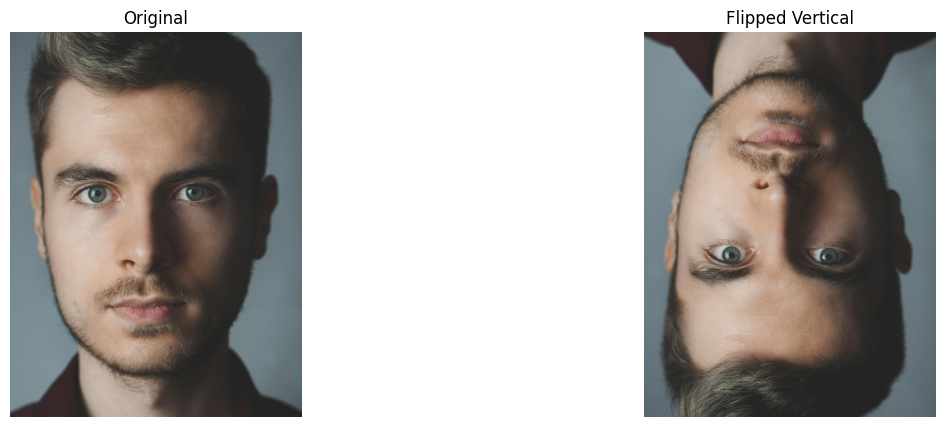

In [91]:
# Mirror the image vertically
flipped_vertical = flip_image_vertical(image)
show_images([image, flipped_vertical], ['Original', 'Flipped Vertical'])

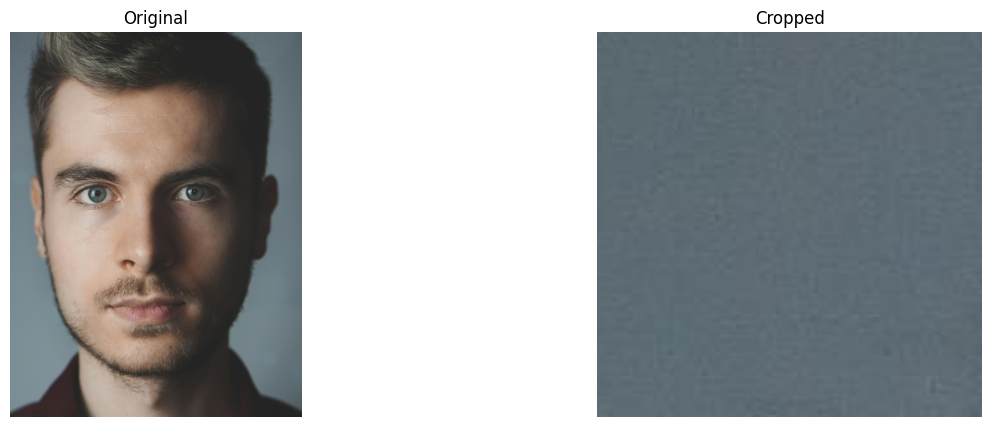

In [92]:
# Crop the image
cropped_image = crop_image(image, 50, 50, 200, 200)  # Choose the area you want to crop
show_images([image, cropped_image], ['Original', 'Cropped'])

In [93]:
# Make the image transparent function
def make_transparent(image, alpha_value):
    
    if alpha_value < 0 or alpha_value > 1:
        raise ValueError("Alpha value must be between 0 and 1.")
    
    if len(image.shape) == 3 and image.shape[2] == 3:  # RGB 
        # Add new alpha channel
        alpha_channel = (np.ones((image.shape[0], image.shape[1])) * alpha_value * 255).astype(np.uint8)
        transparent_image = np.dstack((image, alpha_channel))
    elif len(image.shape) == 3 and image.shape[2] == 4:  # Already RGBA
        # Update existing alpha channel
        image[:, :, 3] = (alpha_value * 255).astype(np.uint8)
        transparent_image = image
    else:
        raise ValueError("Image must be RGB or RGBA.")
    
    return transparent_image

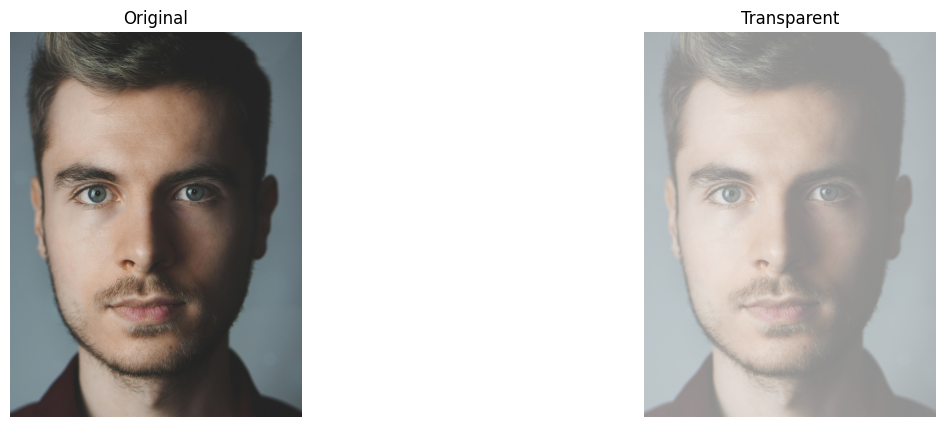

In [94]:
# Transparent the image
alpha_value = 0.5  # %50 şeffaflık
transparent_image = make_transparent(image, alpha_value)
show_images([image, transparent_image], ['Original', 'Transparent'])  # Transparanlaştırma

In [95]:
# Blend the images function
def blend_images(background, foreground):
    if background.shape[:2] != foreground.shape[:2]:
        raise ValueError("Image shapes do not match.")
    
    if len(foreground.shape) != 3 or foreground.shape[2] != 4:
        raise ValueError("Foreground image must be RGBA format.")
    
    # Make sure the alpha channel is normalized (0-1)
    alpha = foreground[:, :, 3] / 255.0
    
    # New Image: alpha-weighted foreground + background
    blended_image = np.zeros_like(background, dtype=np.uint8)
    for c in range(3):  # RGB Channels
        blended_image[:, :, c] = (foreground[:, :, c] * alpha + background[:, :, c] * (1 - alpha)).astype(np.uint8)
    
    return blended_image

In [96]:
# Load the images for blending
image1_path = 'man.jpg'  # Ön plan
image2_path = 'woman.jpg'  # Arka plan
image1 = plt.imread(image1_path)
image2 = plt.imread(image2_path)

In [97]:
# Check the image normalization
if image1.dtype != np.uint8:
    image1 = (image1 * 255).astype(np.uint8)
if image2.dtype != np.uint8:
    image2 = (image2 * 255).astype(np.uint8)

In [98]:
# Equalize the image sizes
image1 = image1[:min(image1.shape[0], image2.shape[0]), :min(image1.shape[1], image2.shape[1])]
image2 = image2[:min(image1.shape[0], image2.shape[0]), :min(image1.shape[1], image2.shape[1])]

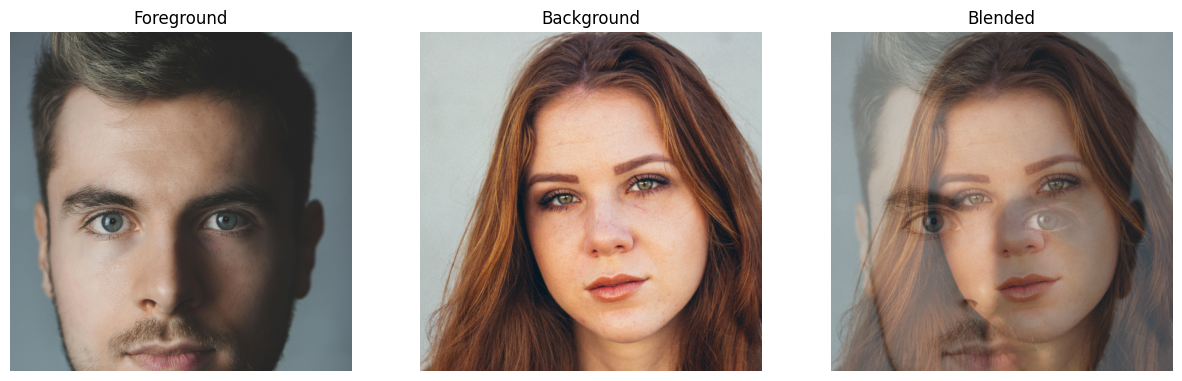

In [99]:
# Make the first image transparent
alpha_value = 0.5
transparent_image1 = make_transparent(image1, alpha_value)

# Blend the images (Foreground, Background)
blended_image = blend_images(image2, transparent_image1)
show_images([image1, image2, blended_image], ['Foreground', 'Background', 'Blended'])

-----------------------------------------------------------------

Red & Blue Colored Image Blend

In [100]:
# Red image function
def red_image(image):
    red = image.copy()
    red[:,:,1] = 0
    red[:,:,2] = 0
    return red

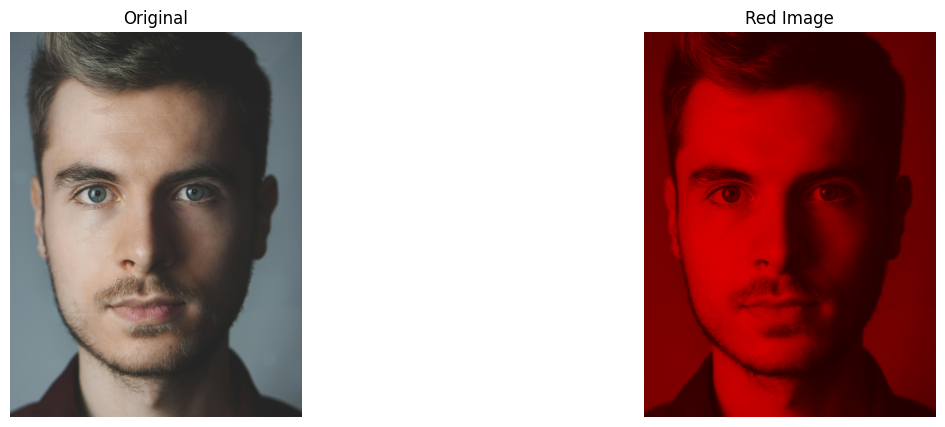

In [101]:
# Red image
red_img = red_image(image)
show_images([image, red_img], ['Original', 'Red Image'])

In [102]:
# Blue iamge function
def blue_image(image):
    blue = image.copy()
    blue[:,:,0] = 0
    blue[:,:,1] = 0
    return blue

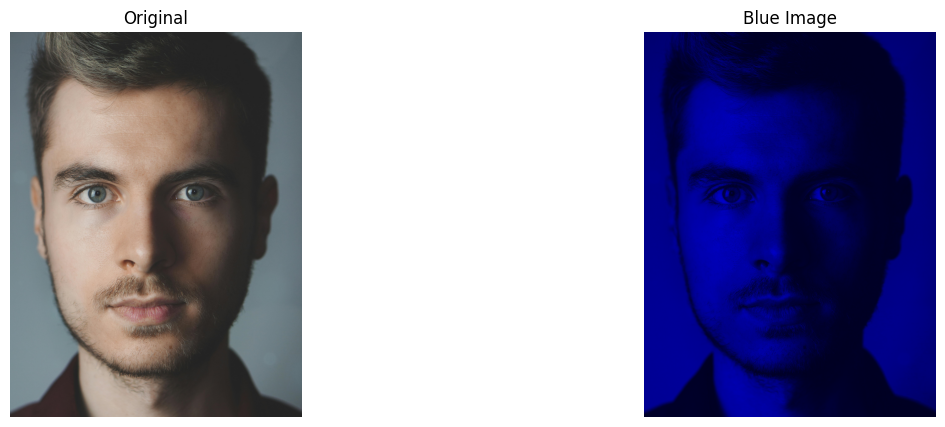

In [103]:
# Blue image
blue_img = blue_image(image)
show_images([image, blue_img], ['Original', 'Blue Image'])

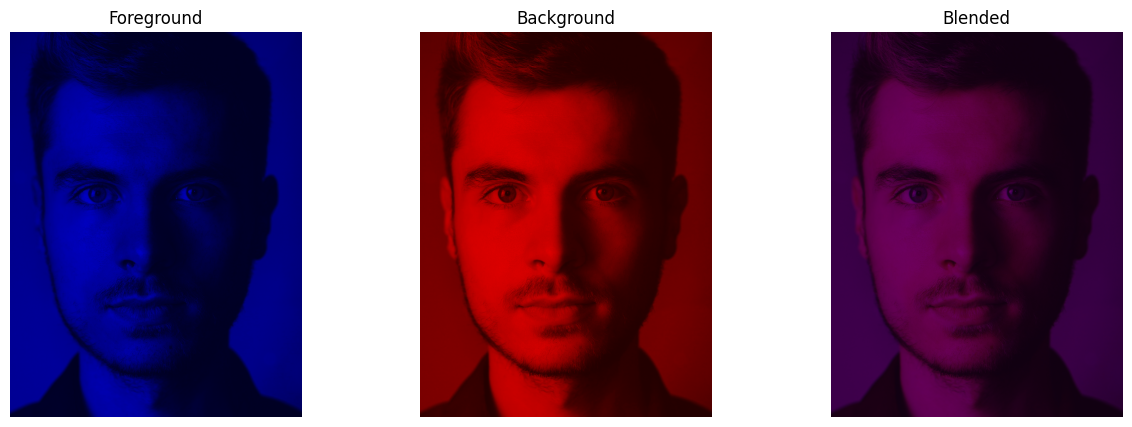

In [104]:
# Make the red image transparent
alpha_value = 0.5
transparent_red = make_transparent(red_img, alpha_value)

# Blend the images (red + blue)
blended_image = blend_images(blue_img, transparent_red)
show_images([blue_img, red_img, blended_image], ['Foreground', 'Background', 'Blended'])

----------------------------------------------------------------------

FINAL FILTER PROJECT

In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the image function
def load_image(image_path):
    image = plt.imread(image_path)
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)  # If it is normalized, convert to 0-255 range
    return image

In [4]:
# Import the man image
man_image = load_image('man.jpg')
man_image.shape

(3688, 2792, 3)

In [5]:
# Import the woman image
woman_image = load_image('woman.jpg')
woman_image.shape

(2768, 3352, 3)

In [6]:
# Neon color grading function
def neon_color_grading(image):
    adjusted_image = image.copy().astype(np.float32)
    adjusted_image[:, :, 0] *= 2.0  # Increase the blue tone
    adjusted_image[:, :, 1] *= 0.8  # Decrease the green tone
    adjusted_image[:, :, 2] *= 1.5  # Increase the red tone

    # Increase the contrast
    adjusted_image = (adjusted_image - 128) * 1.8 + 128
    adjusted_image = np.clip(adjusted_image, 0, 255).astype(np.uint8)
    
    return adjusted_image

In [7]:
# Apply the glitch effect function
def apply_glitch_effect(image, max_offset=20):
    glitched_image = image.copy()
    height, width, _ = image.shape

    # Number of glitches to apply (compatible for both horizontal and vertical)
    num_glitches = max(height, width) // 100

    for _ in range(num_glitches):
        # Appy glitch starting from the first row
        start_row = _ * (height // num_glitches)
        base_glitch_height = max(1, height // num_glitches)  # Glitch height
        glitch_height = int(base_glitch_height * 1.5) 
        
        # Get a slice of the selected row
        end_row = min(start_row + glitch_height, height)
        row_slice = glitched_image[start_row:end_row, :, :]

        # Randomly select offsets for each channel
        offset_r = np.random.randint(-max_offset, max_offset)
        offset_g = np.random.randint(-max_offset, max_offset)
        offset_b = np.random.randint(-max_offset, max_offset)
        
        # Select the channels and apply the offsets
        channel_r = row_slice[:, :, 0]
        channel_g = row_slice[:, :, 1]
        channel_b = row_slice[:, :, 2]
        
        if offset_r > 0:
            channel_r = np.hstack([np.zeros((end_row - start_row, offset_r), dtype=np.uint8), channel_r[:, :-offset_r]])
        elif offset_r < 0:
            channel_r = np.hstack([channel_r[:, -offset_r:], np.zeros((end_row - start_row, -offset_r), dtype=np.uint8)])
        
        if offset_g > 0:
            channel_g = np.hstack([np.zeros((end_row - start_row, offset_g), dtype=np.uint8), channel_g[:, :-offset_g]])
        elif offset_g < 0:
            channel_g = np.hstack([channel_g[:, -offset_g:], np.zeros((end_row - start_row, -offset_g), dtype=np.uint8)])
        
        if offset_b > 0:
            channel_b = np.hstack([np.zeros((end_row - start_row, offset_b), dtype=np.uint8), channel_b[:, :-offset_b]])
        elif offset_b < 0:
            channel_b = np.hstack([channel_b[:, -offset_b:], np.zeros((end_row - start_row, -offset_b), dtype=np.uint8)])
        
        # Stack the channels and update the slice
        row_slice = np.stack([channel_r, channel_g, channel_b], axis=-1)
        glitched_image[start_row:end_row, :, :] = row_slice

    return glitched_image


In [8]:
# Apply the vignette effect function
def cyberpunk_vignette_effect(image):
    height, width, _ = image.shape
    center_x, center_y = width // 2, height // 2
    max_dist = np.sqrt(center_x**2 + center_y**2)
    
    vignette = np.zeros((height, width), dtype=np.float32)
    for y in range(height):
        for x in range(width):
            dist = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            vignette[y, x] = 1 - (dist / max_dist)  # Vignette effect
    
    # Apply the vignette effect to the image
    vignette = np.clip(vignette, 0.1, 1)  # Darkening amount
    vignette = vignette[:, :, np.newaxis]
    return (image * vignette).astype(np.uint8)

In [9]:
# Apply the final function
def apply_cyberpunk_design(image):
    # Apply the neon color grading
    color_graded = neon_color_grading(image)

    # Then, apply the glitch effect
    glitched = apply_glitch_effect(color_graded)
    
    # Last, apply the vignette effect
    final_image = cyberpunk_vignette_effect(glitched)
    
    return final_image

In [10]:
# Apply the cyberpunk design (final) to the images
cyberpunk_image_man = apply_cyberpunk_design(man_image)
cyberpunk_image_woman = apply_cyberpunk_design(woman_image)

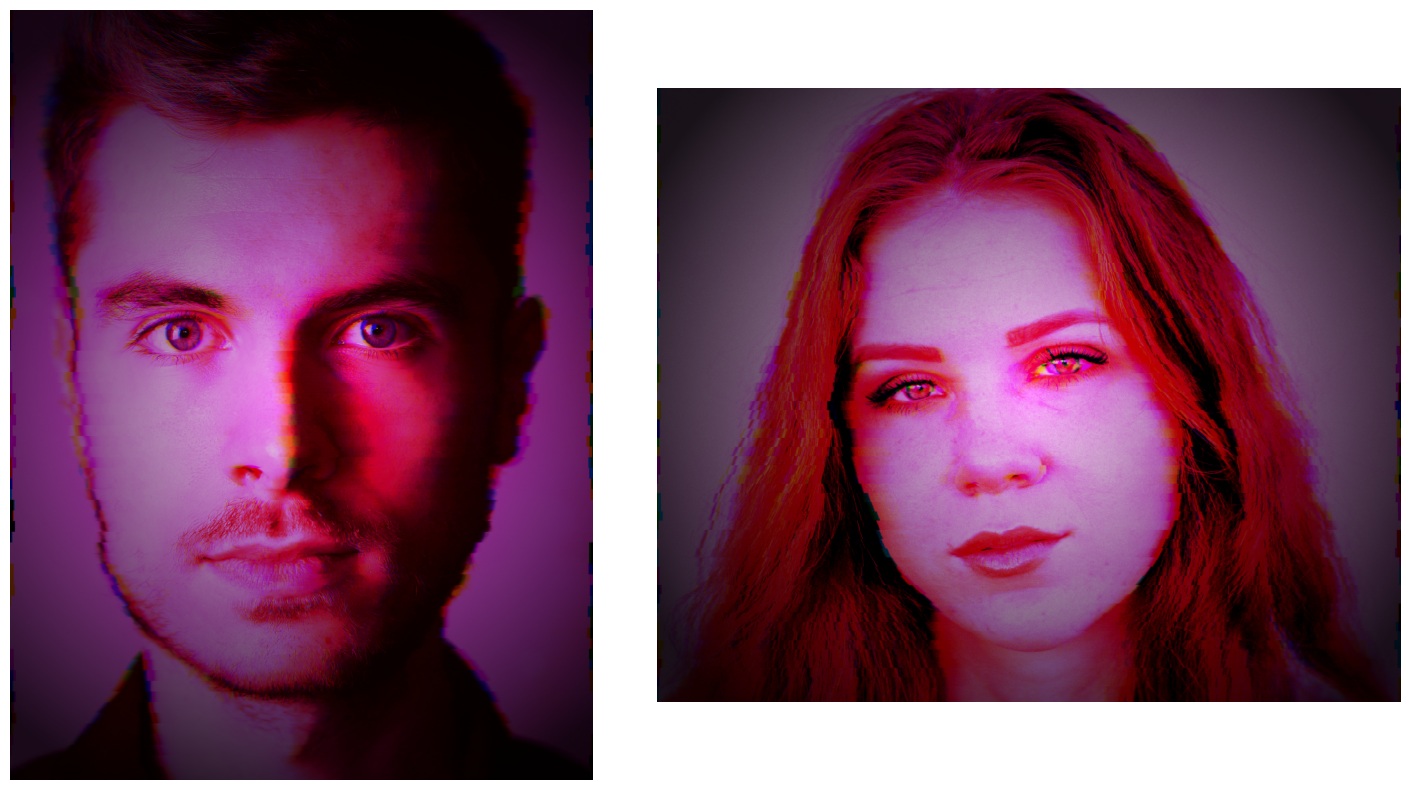

In [11]:
# Save images
plt.imsave('cyberpunk_image_woman.jpg', cyberpunk_image_woman)
plt.imsave('cyberpunk_image_man.jpg', cyberpunk_image_man)

# Show the images
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(cyberpunk_image_man)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cyberpunk_image_woman)
plt.axis('off')

plt.tight_layout()
plt.show()